# Graph III

In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
from IPython.display import display, Image

In [2]:
class AgentState(TypedDict):
    name: str
    age: int
    final: str

In [3]:
# first node of the graph
def first_node(state: AgentState) -> AgentState:
    """Simulates getting the user's name and age."""
    state['final'] = f"Hello, {state['name']}!"
    return state

# second node of the graph
def second_node(state: AgentState) -> AgentState:
    """Appends a message based on age."""
    # if state['age'] < 18:
    #     state['final'] += " You are a minor."
    # else:
    #     state['final'] += " You are an adult."

    # update the final state
    state['final'] += f" You are {state['age']} years old and you're {state['age'] >= 18 and 'an adult' or 'a minor'}."

    # Return the updated state
    return state

In [4]:
# Initialize the state graph
graph = StateGraph(AgentState)

# Add the nodes
graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)

# this is entry point
graph.set_entry_point("first_node")

# edge between first and second node
# 1st parameter is "from" node, 2nd parameter is "to" node
graph.add_edge("first_node", "second_node")

# this is finish point
graph.set_finish_point("second_node")

# Compile the graph
app = graph.compile()

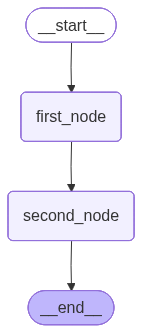

In [5]:
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
initial_state: AgentState = {
    "name": "Bob",
    "age": 19
}

final_state: AgentState = app.invoke(initial_state)
final_state["final"]

"Hello, Bob! You are 19 years old and you're an adult."